<a href="https://colab.research.google.com/github/VelociraptorAndCo/V_Digit_Detector/blob/main/%D0%B4%D0%BE%D0%BE%D0%B1%D1%83%D1%871.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **install**

In [2]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 6205, done.
remote: Total 6205 (delta 0), reused 0 (delta 0), pack-reused 6205
Receiving objects: 100% (6205/6205), 13.47 MiB | 29.03 MiB/s, done.
Resolving deltas: 100% (4200/4200), done.


In [3]:
!cd keras-retinanet && pip install . 

Processing /content/keras-retinanet
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=168463 sha256=515bc0073a93d25d7c7eb44a12b25c041692efd74fdf41e22bd90ab9e74b609d
  Stored in directory: /root/.cache/pip/wheels/32/29/34/9b33c07f08b1be9e77607c1fc6b08c679489aa7ddaed329652
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=69112565e5416d92ae793bd6ec93648219ce82770588e4c02e6e9b2c3623616d
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successf

In [4]:
!pip install keras-retinanet  --user

In [5]:
!cd keras-retinanet && python setup.py build_ext --inplace  && python setup.py install 

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/keras_retinanet
creating build/temp.linux-x86_64-3.7/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-pX47U3/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-pX47U3/python3.7-3.7.12=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -

In [6]:
#!pip install --upgrade git+https://github.com/broadinstitute/keras-resnet
!pip install keras-resnet
import keras
import keras_resnet 

In [7]:
%cd keras-retinanet

/content/keras-retinanet


In [8]:
import matplotlib.pyplot as plt

import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
from tensorflow import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import cv2
import time

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **check**

!!

In [10]:
!cd snapshots && curl -L -O https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5

# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
#model_path = os.path.join('snapshots', 'resnet50_coco_best_v2.1.0.h5')
model_path = './snapshots/resnet50_coco_best_v2.1.0.h5'

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')


# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   667  100   667    0     0   2223      0 --:--:-- --:--:-- --:--:--  2215
100  145M  100  145M    0     0   111M      0  0:00:01  0:00:01 --:--:--  168M


In [11]:
# load label to names mapping for visualization purposes
labels_to_names = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle',
                   4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat',
                   9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 
                   12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat',
                   16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant',
                   21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella',
                   26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 
                   31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat',
                   35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 
                   38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup',
                   42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 
                   47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 
                   51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut',
                   55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',
                   59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop',
                   64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone',
                   68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator',
                   73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors',
                   77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}


processing time:  4.431487560272217
[193.01634 361.2275  291.3746  501.9082 ]
scissors 0.730


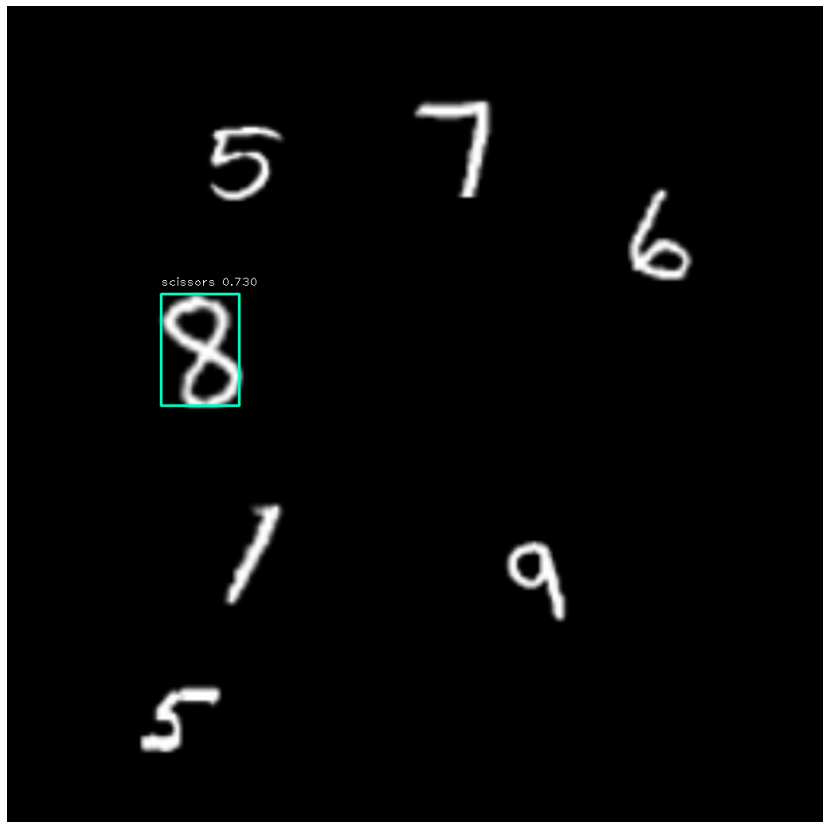

In [28]:
# load image
#img = read_image_bgr(os.path.join('examples','000000008021.jpg'))
image = cv2.resize(img, (1024,1024))
#image = cv2.transpose(image)

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    print(box)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    print(caption)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

# **Mnist**


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
mnist = pd.read_csv("/content/sample_data/mnist_train_small.csv")
#mnist.head()#num*28*28 from 0 to 19998
from random import randint
import cv2

In [10]:
def mnistimg (n):
  from PIL import Image
  a = mnist.iloc[n]
  anum = a[0]
  a = a.reset_index(drop=True).drop([0]).to_numpy(dtype=np.uint8)
  a = a.reshape((28,28))
  #print(a.shape)
  #plt.imshow(np.stack((a,)*3, axis=-1))
  s = randint(32,50)
  image2 = Image.fromarray(a)
  a = np.asarray(image2.resize((s,s)))
  return (anum,s,a)

def intersect(x,y,s,xp,yp,sp):
  if xp>x+s : return False
  if x>xp+sp : return False
  if y>yp+sp : return False
  if yp>y+s : return False
  return True

def getimg():
  img = np.zeros((256,256), np.uint8)
  amount = randint(5,12)
  nums = []

  for i in range(amount):
    (num,s,a) = mnistimg(randint(0, 19998)) #!!!!!!!!! ssssss!!!!!!! Ниже не меняла что есть еще и размер
    while 1: 
      x = randint(0, 256-s)
      y = randint(0, 256-s)
      if not all([ not intersect(x,y,s,xp,yp,sp) for nump,sp,xp,yp in nums]): continue
      break
      #изменение масштаба
    img[x:x+s, y:y+s] = a
    nums.append([num,s,x,y])
  img = np.stack((img,)*3, axis=-1)
  return(nums,img)

[[7, 36, 170, 26], [4, 36, 178, 101], [0, 38, 103, 156], [2, 39, 21, 192], [9, 35, 65, 19], [9, 42, 160, 153], [6, 47, 52, 93], [5, 37, 211, 147], [7, 50, 11, 20], [8, 49, 207, 26]]


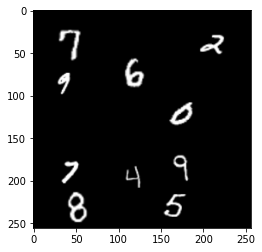

In [13]:
nums,img = getimg()
print(nums)
#print(np.max(img))
plt.imshow(img)

[9, 32, 143, 8]
[8, 143, 40, 175]
skateboard 0.313
[4, 38, 146, 130]
[130, 146, 168, 184]
skateboard 0.313
[8, 44, 185, 132]
[132, 185, 176, 229]
skateboard 0.313
[6, 49, 84, 66]
[66, 84, 115, 133]
skateboard 0.313
[5, 41, 20, 180]
[180, 20, 221, 61]
skateboard 0.313


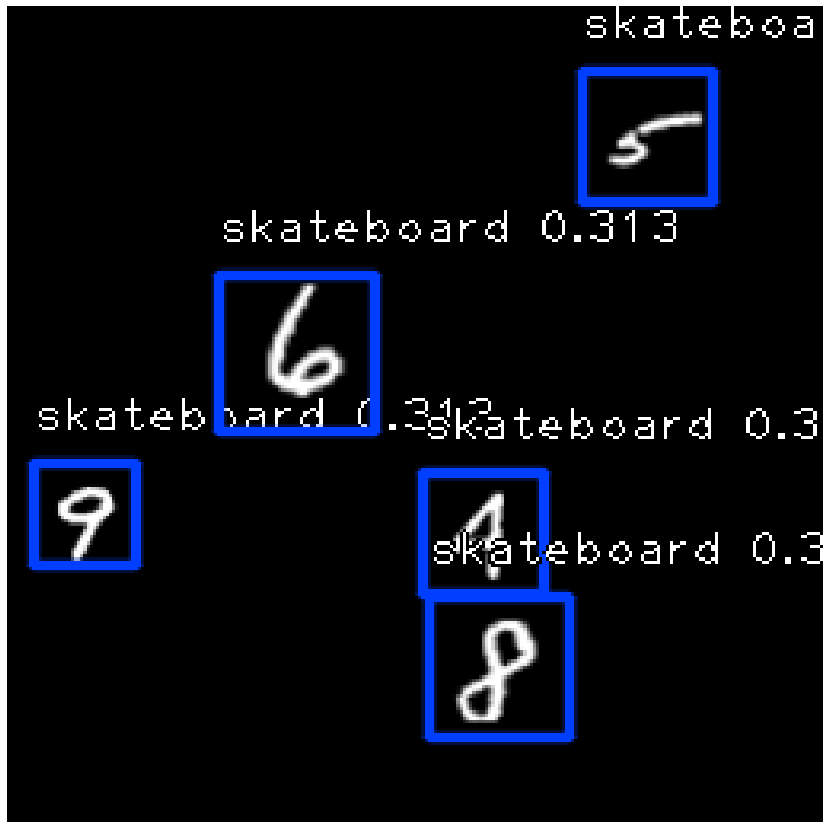

In [47]:
draw = img.copy()
for a in nums:
    # scores are sorted so we can break
    
     box = [ a[3],a[2],a[3]+a[1],a[2]+a[1]]
     print(a) 
     print(box)    
     color = label_color(label)
        
     b = box#.astype(int)
     draw_box(draw, b, color=color)
     caption = "{} {:.3f}".format(labels_to_names[label], score)
     print(caption)
     draw_caption(draw, b, caption)
      
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

In [11]:
mapdf = pd.DataFrame([i for i in range(10)])
mapdf.to_csv('classes.csv', header = False)

In [12]:
imgdf = pd.DataFrame(columns = ['path/to/image.jpg','y1','x1','y2','x2','class_name'])

for i in range(10000):# num of imgs
  nums,img = getimg()
  path = 'images/img'+str(i)+'.jpg'
  bul = cv2.imwrite(path,img)
  if not bul: print('ERROR')
  path1 =[]
  x1= []
  y1= []
  x2= []
  y2= []
  class_name = []
  for [num,s,x,y] in nums:
    path1.append(path)
    x1.append(x)
    y1.append(y)
    x2.append(x+s)
    y2.append(y+s)
    class_name.append(num)
  idf = pd.DataFrame({'path/to/image.jpg': path1,
                                      'y1' : y1,
                                      'x1' : x1,
                                      'y2' : y2,
                                      'x2' : x2,
                              'class_name' : class_name})
  imgdf = imgdf.append(idf)
print(imgdf)
plt.imshow(cv2.imread('images/img0.jpg'))
imgdf.to_csv('img.csv', header = False, index = False)

KeyboardInterrupt: ignored

# **train**

In [12]:
!cd snapshots && curl -L -O https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   667  100   667    0     0   1863      0 --:--:-- --:--:-- --:--:--  1863
100  145M  100  145M    0     0  13.5M      0  0:00:10  0:00:10 --:--:-- 16.3M


In [13]:

# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model0_path = './snapshots/resnet50_coco_best_v2.1.0.h5'

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)
#scales = '/content/drive/MyDrive/models/scales' '--config {scales}'


In [ ]:
'''keras_retinanet.models.backbone('resnet50').retinanet(num_classes=80)

model.compile(
    loss={
        'regression'    : keras_retinanet.losses.smooth_l1(),
        'classification': keras_retinanet.losses.focal()
    },
    optimizer=keras.optimizers.Adam(lr=1e-5, clipnorm=0.001)
)'''



In [ ]:
!retinanet-train  --freeze-backbone --random-transform --weights {model0_path} --batch-size 10 --steps 1000 --epochs 10 csv img.csv classes.csv

Creating model, this may take a second...
2022-02-22 13:20:23.375562: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Model: "retinanet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1 (Conv2D)                 (No

In [16]:
!cp ./snapshots/resnet50_csv_10.h5 /content/drive/MyDrive/models

# **check**

In [13]:
!cp /content/drive/MyDrive/models/resnet50_csv_05.h5 ./snapshots 

In [ ]:
! pwd # хде я

/content/keras-retinanet


In [31]:
#!retinanet-convert-model ./snapshots/resnet50_csv_05.h5 ./snapshots/detect.h5

In [14]:
#!cd snapshots && curl -L -O https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5

# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = './snapshots/resnet50_csv_05.h5'
#model_path = './snapshots/resnet50_csv_05.h5'
# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')
model = models.convert_model(model)
# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

[[4, 38, 31, 33], [4, 39, 66, 186], [7, 39, 154, 53], [8, 49, 155, 130], [9, 40, 22, 120], [1, 48, 206, 54], [4, 49, 77, 129], [7, 34, 149, 3]]


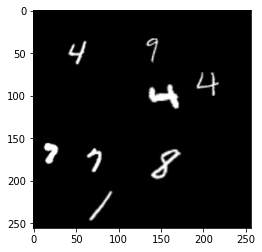

In [18]:
nums,img = getimg()
print(nums)
plt.imshow(img)

processing time:  4.502742767333984
---
---
1 0.925
---
---
8 0.891
---
---
4 0.862
---
---
4 0.862
---
---
4 0.809
---
---
7 0.638
---
---
6 0.620
---
---
6 0.546
---
---
9 0.513
---


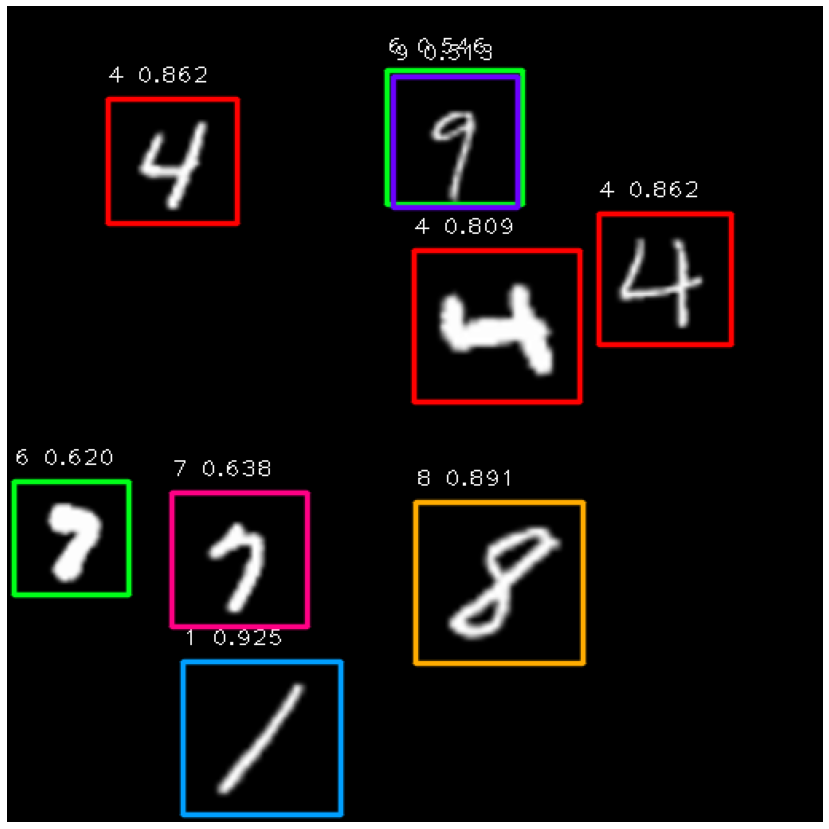

In [19]:
image = cv2.resize(img, (512,512))
#image = cv2.transpose(image)
#image = img
# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    print('---')
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    print('---')
    caption = "{} {:.3f}".format(label, score)
    print(caption)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()